##### Simple Linear Regression
Simple Linear Regression is a linear regression model with a single independent variable that allows us to summarize and study relationships between two continuous (quantitative) variables
One variable, denoted $x$, is regarded as the independent or feature variable. The other variable, denoted $y$, is regarded as the dependent or target variable.
  
  $$
  y=\alpha +\beta x,
  $$

As a (simulate) example, It is assumed that the two variables are linear related. Hence, we try to find a linear function that predicts the target values and the line of best fit - the regression line from error would be minimal. We are trying to minimize the lenght between the observed(training-$y_i$) value and the predicted(testing-$y_p$) values from our model.

  $$
  min\{SUM(y_i - y_p)^2\}
  $$
  
In this regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hours the studied.
  
  $$
  Score=\alpha +\beta * hours
  $$
  
  > where<br/>
  > $\alpha$ is y intercept<br/>
  > $\beta$ is slop

##### Import Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

##### Import Data

In [2]:
df = pd.read_csv('day_004_student_scores.csv')
X = df.iloc[ : ,   : 1 ].values
Y = df.iloc[ : , 1 ].values

In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape

(25, 2)

##### Data Visualization
To visualize distribution of data

Regression line is drawn over the points

/home/ubuntu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


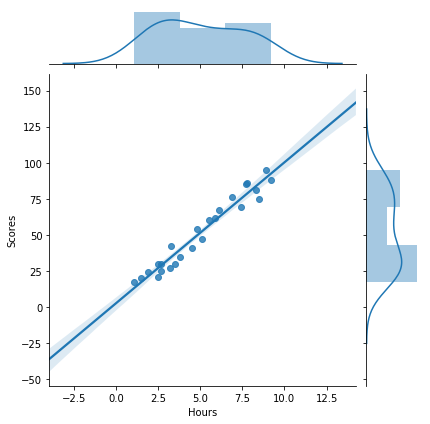

In [5]:
import seaborn as sns
sns.jointplot(x=df['Hours'], y=df['Scores'], data=df, kind='reg')

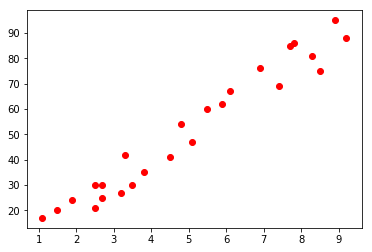

In [6]:
plt.scatter(X , Y, color = 'red')

##### Check for missing data

In [7]:
df.isnull().values.any()

False

##### Split Data

In [8]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 42) 
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

#
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (20, 1)
Test - Predictors shape (5, 1)
Train - Target shape (20, 1)
Test - Target shape (5, 1)


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


##### Linear Regression using sklearn library

.fit() -> fits a linear model<br/>
.predict() -> Predict Y using the linear model with estimated coefficients<br/>
.score() -> Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model<br/>
.coef_ -> gives the coefficients<br/>
.intercept_ -> gives the estimated intercepts<br/>

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#Fit method is used for fitting your training data into the model
regressor = regressor.fit(x_train, y_train)

In [10]:
y_pred = regressor.predict(x_test)

In [11]:
print('Co-efficient of linear regression',regressor.coef_)

Co-efficient of linear regression [[9.68207815]]


In [12]:
print('Intercept of linear regression model',regressor.intercept_)

Intercept of linear regression model [2.82689235]


  we got
  
  $$
  Score=2.82689235 + 9.68207815hours
  $$

In [14]:
from sklearn import metrics
print('Mean Square Error', metrics.mean_squared_error(y_test, y_pred))

Mean Square Error 18.943211722315272


In [16]:
print('Model R^2 Square value', metrics.r2_score(y_test, y_pred))

Model R^2 Square value 0.9678055545167994


Text(0.5,1,'Linear Regression')

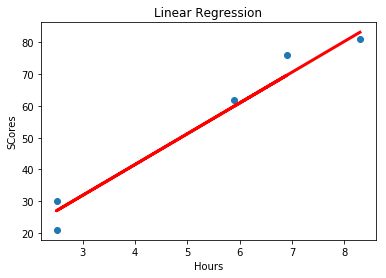

In [18]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red', linewidth=3)
plt.xlabel('Hours')
plt.ylabel('SCores')
plt.title('Linear Regression')

Text(0,0.5,'Residual')

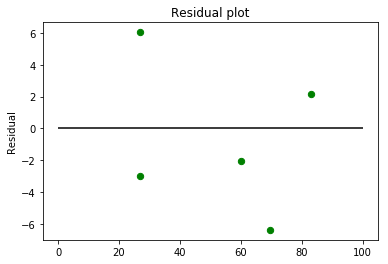

In [20]:
#Residual plot
plt.scatter(regressor.predict(x_test), regressor.predict(x_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

points are scattered around the line zero and there is no pattern that can be observed. This indicates that there no relation between predictors or time dependant data that is missed.

##### Linear Regression using normal equations

In [21]:
def theta_calc(x_train, y_train):
    #Initializing all variables
    n_data = x_train.shape[0]
    bias = np.ones((n_data,1))
    x_train_b = np.append(bias, x_train, axis=1)
    #
    theta_1 = np.linalg.inv(np.dot(x_train_b.T,x_train_b))
    theta_2 = np.dot(theta_1, x_train_b.T)
    theta = np.dot(theta_2,y_train)
    #
    return theta

In [22]:
def predict_func(slope,intercept,x_test):
    #
    pred = []
    n_data = x_test.shape[0]
    for i in range(n_data):
        pred.append((slope * x_test[i]) + intercept)
        
    return pred

In [23]:
def mse_calc(prediction, y_test):
    #
    total_data = len(prediction)
    error = 0
    error = (np.sum((prediction - y_test)**2))/total_data
    return error

In [24]:
def rsq(prediction, y_test):
    #
    total_data = len(prediction)
    #Average of total prediction 
    y_avg = np.sum(y_test)/total_data
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    #
    r2 = 1 - (res_err / tot_err)
    return r2

In [25]:
theta = theta_calc(x_train, y_train)
intercept = theta[0]
slope = theta[1]
print('Intercept of the model', intercept)
print('Slope of the model', slope)
#Prediction calculation
prediction = predict_func(slope, intercept, x_test)
#MSE calculation
error =  mse_calc(prediction, y_test)
print('Mean squared error of the model', error)
#R-square calculation
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)

Intercept of the model [2.82689235]
Slope of the model [9.68207815]
Mean squared error of the model 18.943211722315343
R squared value 0.9678055545167992


Text(0,0.5,'Residual')

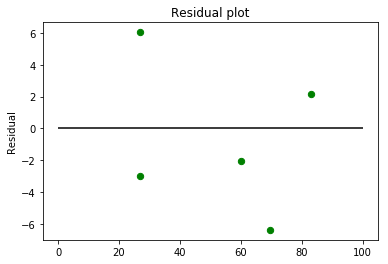

In [26]:
#Residual plot
plt.scatter(prediction, prediction - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

##### Linear Regression using Gradient Descent

In [27]:
def mse_calc(slope, intercept, x_train, y_train):
    tot_error = 0
    pred = []
    for i in range(len(x_train)):
        #calculating total error. It follows the formula y=mx+c
        #m is the slope and c is the intercept
        pred.append(((slope*x_train[i]) + intercept))
        tot_error += (y_train[i] - ((slope*x_train[i]) + intercept)) ** 2
        
    error = tot_error / float(len(x_train))
    return error, pred

In [32]:
#gradient descent 
def grad_descent(s_slope, s_intercept, l_rate, iter_val, x_train, y_train):
    
    for i in range(iter_val):
        int_slope = 0
        int_intercept = 0
        n_pt = float(len(x_train))
        
        for i in range(len(x_train)):
            int_intercept += - (2/n_pt) * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            int_slope += - (2/n_pt) * x_train[i] * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            
        final_slope = s_slope - (l_rate * int_slope)
        final_intercept = s_intercept - (l_rate * int_intercept)
        s_slope = final_slope
        s_intercept = final_intercept
        
    return  s_slope, s_intercept

Slope of the model [2.68852453]
Intercept of the model [0.43737708]
Error value of the model [1888.99749305]
R squared value -2.210396827081152


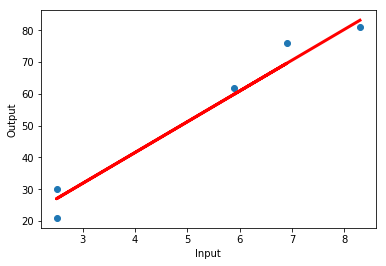

In [31]:
#defining slope and intercept value as 0 
learning_rate = 0.0001
start_slope = 0
start_intercept = 0
iteration = 50
#intial run
grad_slope, grad_intercept = grad_descent(start_slope, start_intercept, learning_rate, iteration, x_train, y_train)
final_e_value, prediction = mse_calc(grad_slope, grad_intercept, x_test, y_test)
#
print('Slope of the model', grad_slope)
print('Intercept of the model', grad_intercept)
print('Error value of the model', final_e_value)
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)
#Graph
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red', linewidth = 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()